In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from findlay2025a import core, plotting

In [2]:
nb = core.get_project("seahorse")
psds = pd.read_parquet(nb.get_project_file("psds_by_condition.pqt"))
pct_changes = pd.read_parquet(nb.get_project_file("psd_pct_changes.pqt"))

In [3]:
def get_nrem_homeostasis_palette():
    p = plotting.get_paired_palette()
    return {
        "early_bsl_nrem": p[0],
        "early_rec_nrem_match": p[1],
        "early_ext_wake": p[2],
        "late_ext_wake": p[3],
        "early_rec_nrem": p[4],
        "late_rec_nrem": p[5],
    }


def get_contrast_palette():
    p = plotting.get_paired_palette()
    return {
        "nrem_rebound": p[9],
        "nrem_rec_decline": p[5],
        "nrem_bsl_decline": p[1],
        "nrem_surge": p[8],
        "ext_wake_incline": p[3],
    }


rois = ["CX", "CA1-so", "CA1-sp", "CA1-sr", "CA1-slm", "DG"]

### Extended data figure 10A

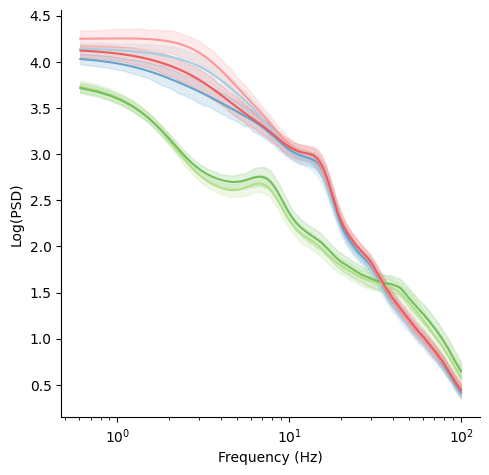

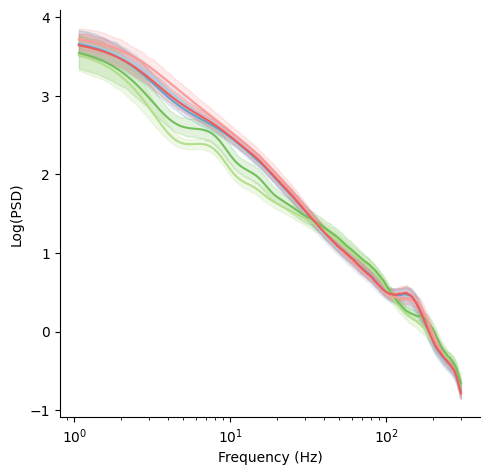

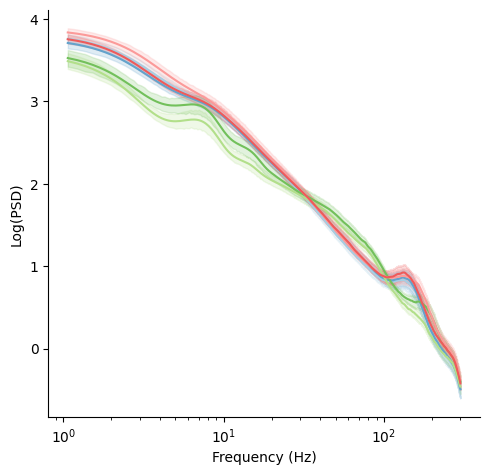

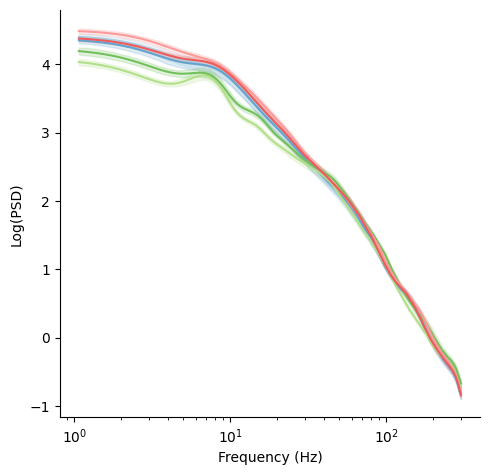

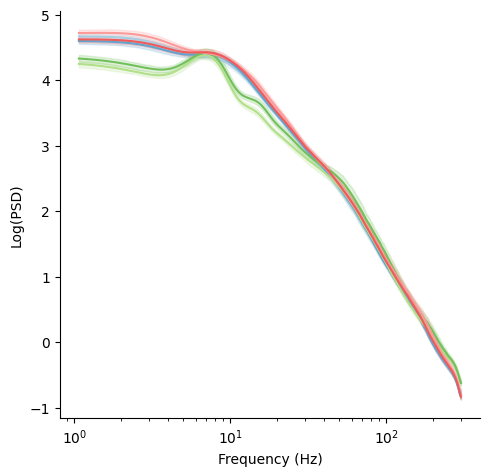

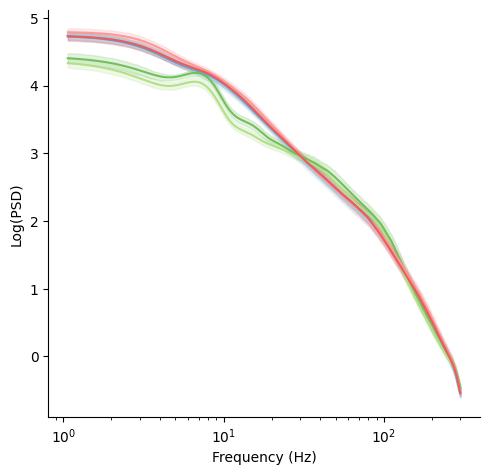

In [ ]:
for roi in rois:
    g = sns.relplot(
        data=psds.loc[psds["roi"] == roi],
        x="frequency",
        y="psd",
        row="roi",
        col="experiment",
        hue="condition",
        hue_order=[
            "early_bsl_nrem",
            "early_rec_nrem_match",
            "early_ext_wake",
            "late_ext_wake",
            "early_rec_nrem",
            "late_rec_nrem",
        ],
        palette=get_nrem_homeostasis_palette(),
        errorbar=("ci", 95),
        legend=False,
        kind="line",
    )
    g.set_xlabels("Frequency (Hz)").set_ylabels("Log(PSD)").set(xscale="log")
    g.set_titles("")
    # g.savefig(nb.get_project_file(f"figures/{roi}_nrem_homeostasis_psds.png"), dpi=600)

### Extended data figure 10B, top

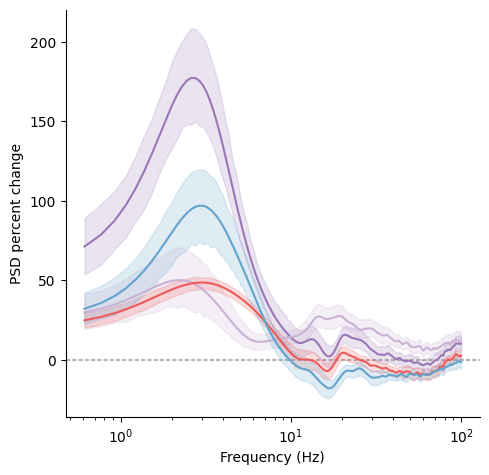

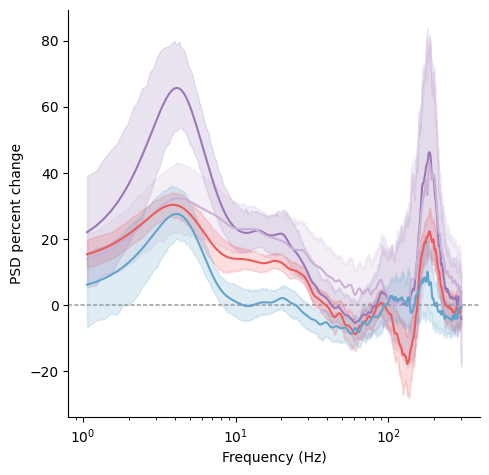

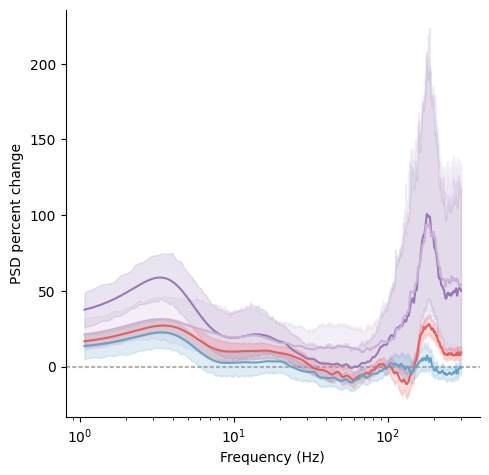

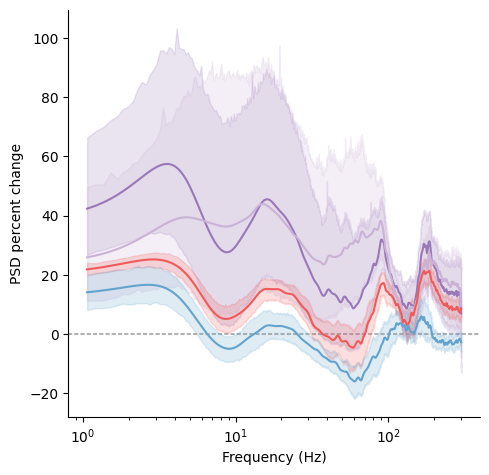

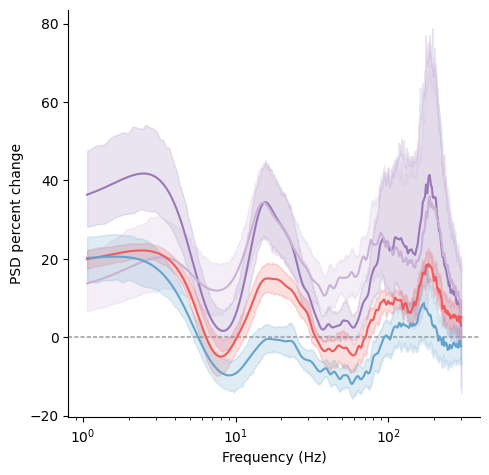

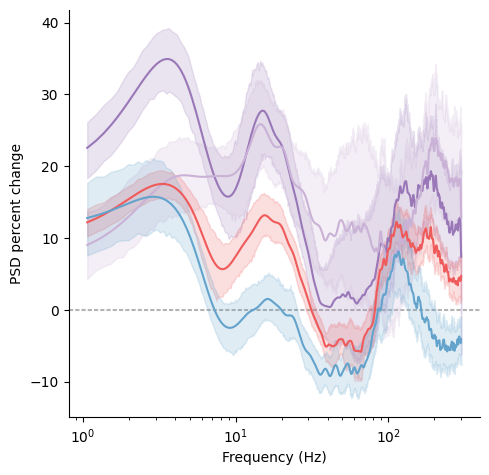

In [8]:
for roi in rois:
    g = sns.relplot(
        data=pct_changes.loc[pct_changes["roi"] == roi],
        x="frequency",
        y="percent_change",
        row="roi",
        col="experiment",
        hue="contrast",
        hue_order=[
            "nrem_rebound",
            "nrem_surge",
            "nrem_rec_decline",
            "nrem_bsl_decline",
        ],
        palette=get_contrast_palette(),
        errorbar=("ci", 95),
        legend=False,
        kind="line",
    )
    g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
    g.set_xlabels("Frequency (Hz)").set_ylabels("PSD percent change").set(xscale="log")
    g.set_titles("")
    # g.savefig(nb.get_project_file(f"{roi}_nrem_psd_contrasts.png"), dpi=600)

### Extended data figure 10B, bottom

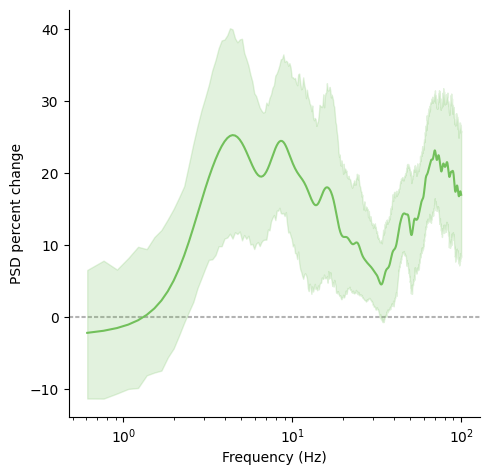

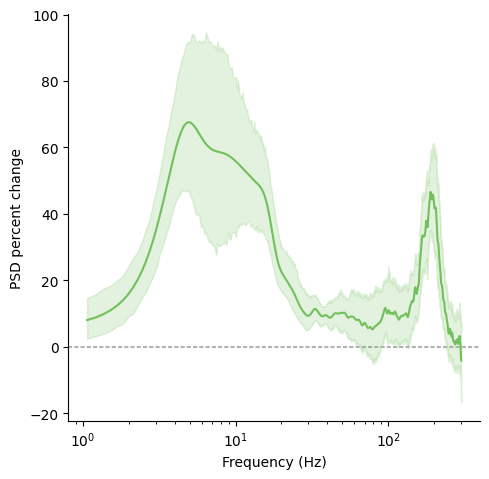

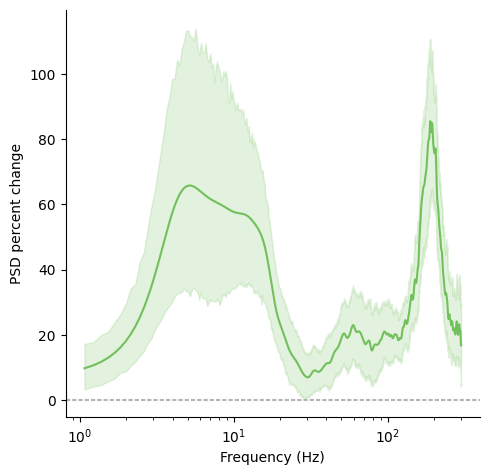

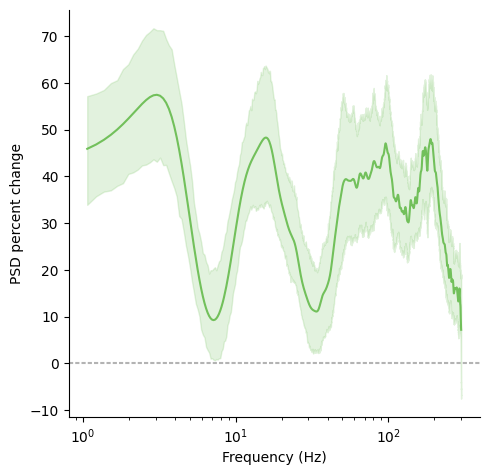

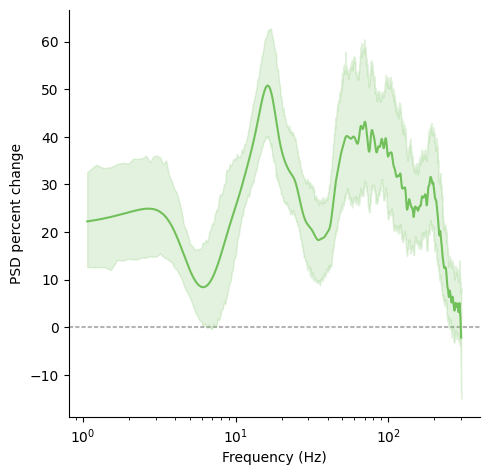

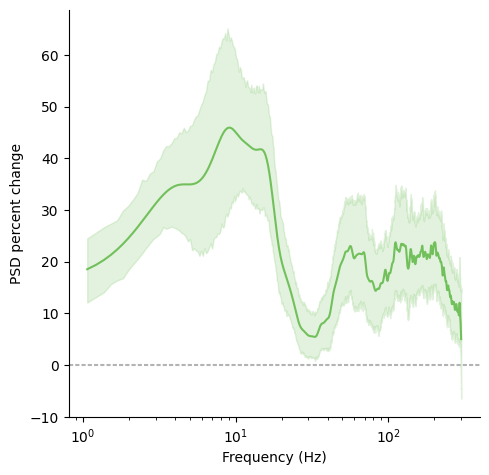

In [9]:
for roi in rois:
    g = sns.relplot(
        data=pct_changes.loc[pct_changes["roi"] == roi],
        x="frequency",
        y="percent_change",
        row="roi",
        col="experiment",
        hue="contrast",
        hue_order=["ext_wake_incline"],
        palette=get_contrast_palette(),
        errorbar=("ci", 95),
        legend=False,
        kind="line",
    )
    g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
    g.set_xlabels("Frequency (Hz)").set_ylabels("PSD percent change").set(xscale="log")
    g.set_titles("")
    # g.savefig(nb.get_project_file(f"figures/{roi}_ext_wake_psd_incline.png"), dpi=600)